### Part 1-1 Grammar Generation

In [1]:
simple_grammar = """
sentence => noun_phrase verb_phrase
noun_phrase => Article Adj* noun
Adj* => null | Adj Adj*
verb_phrase => verb noun_phrase
Article =>  一个 | 这个
noun =>   女人 |  篮球 | 桌子 | 小猫
verb => 看着   |  坐在 |  听着 | 看见
Adj =>  蓝色的 | 好看的 | 小小的
"""

In [16]:
import random

def adj(): return random.choice("蓝色的 | 好看的 | 小小的".split("|")).split()[0]

def adj_star(): return random.choice([lambda : '', lambda : adj() + adj_star()])()

In [17]:
adj_star()

'好看的'

### Part 1-2 Seperate the change of grammar and sentence generation

In [19]:
adj_grammar = """
Adj* => null | Adj Adj*
Adj =>  蓝色的 | 好看的 | 小小的
"""

In [26]:
def create_grammar(grammar_str, split = "=>", line_split = "\n"):
    grammar = {}
    for line in grammar_str.split(line_split):
        if not line.strip(): continue
        exp, stmt = line.split(split)
        grammar[exp.strip()] = [s.split() for s in stmt.split("|")]
    return grammar

In [28]:
grammar = create_grammar(adj_grammar)
grammar["Adj*"]

[['null'], ['Adj', 'Adj*']]

In [29]:
choice = random.choice

def generate(gram, target):
    if target not in gram: return target # means target is a terminal expression
    
    expaned = [generate(gram, t) for t in choice(gram[target])]
    return "".join([e if e!="\n" else "\n" for e in expaned if e != 'null'])

In [30]:
example_grammar = create_grammar(simple_grammar)

In [34]:
generate(gram = example_grammar, target = 'sentence')

'这个好看的女人听着一个女人'

### Part 2 Data-Driven Language Model

In [42]:
filename2 = "sqlResult_1558435.csv"
import pandas as pd
content = pd.read_csv(filename2, encoding = "gb18030")

In [47]:
articles = content['content'].tolist()
content.head()

,id,author,source,content,feature,title,url
0,89617,NaN,快科技@http://www.kkj.cn/,此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""37""...",小米MIUI 9首批机型曝光：共计15款,http://www.cnbeta.com/articles/tech/623597.htm
1,89616,NaN,快科技@http://www.kkj.cn/,骁龙835作为唯一通过Windows 10桌面平台认证的ARM处理器，高通强调，不会因为只考...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""15""...",骁龙835在Windows 10上的性能表现有望改善,http://www.cnbeta.com/articles/tech/623599.htm
2,89615,NaN,快科技@http://www.kkj.cn/,此前的一加3T搭载的是3400mAh电池，DashCharge快充规格为5V/4A。\r\n...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""18""...",一加手机5细节曝光：3300mAh、充半小时用1天,http://www.cnbeta.com/articles/tech/623601.htm
3,89614,NaN,新华社,这是6月18日在葡萄牙中部大佩德罗冈地区拍摄的被森林大火烧毁的汽车。新华社记者张立云摄\r\n,"{""type"":""国际新闻"",""site"":""环球"",""commentNum"":""0"",""j...",葡森林火灾造成至少62人死亡 政府宣布进入紧急状态（组图）,http://world.huanqiu.com/hot/2017-06/10866126....
4,89613,胡淑丽_MN7479,深圳大件事,（原标题：44岁女子跑深圳约会网友被拒，暴雨中裸身奔走……）\r\n@深圳交警微博称：昨日清...,"{""type"":""新闻"",""site"":""网易热门"",""commentNum"":""978"",...",44岁女子约网友被拒暴雨中裸奔 交警为其披衣相随,http://news.163.com/17/0618/00/CN617P3Q0001875...


In [48]:
import re
def token(string):
    return re.findall('\w+', string)

In [50]:
from collections import Counter
with_jieba_cut = Counter(jieba.cut(articles[110]))

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\Haobo\AppData\Local\Temp\jieba.cache
Loading model cost 1.151 seconds.
Prefix dict has been built succesfully.


In [51]:
with_jieba_cut.most_common()[:10]

[('，', 88),
 ('的', 73),
 ('。', 39),
 ('\r\n', 27),
 ('了', 20),
 ('们', 18),
 ('工作队', 16),
 ('村民', 15),
 ('收割', 14),
 ('、', 12)]

In [52]:
articles_clean = ["".join(token(str(a))) for a in articles]
len(articles_clean)

89611

In [53]:
filename = 'article_9k.txt'
with open(filename, 'w') as f:
    for a in articles_clean:
        f.write(a + '\n')

In [54]:
import jieba

TOKEN = []

def cut(string): return list(jieba.cut(string))

In [57]:
for i, line in enumerate(open(filename)):
    if i% 5000 == 0: print(i)
    
    if i > 50000: break
    TOKEN += cut(line)

0
5000
10000
15000
20000
25000
30000
35000
40000
45000
50000


In [60]:
from functools import reduce
from operator import add, mul
from collections import Counter

words_count = Counter(TOKEN)
words_count.most_common(500)

[('的', 1843644),
 ('n', 952258),
 ('在', 679843),
 ('月', 481778),
 ('日', 421186),
 ('新华社', 354875),
 ('和', 349460),
 ('了', 321325),
 ('年', 314087),
 ('是', 266654),
 ('\n', 229223),
 ('１', 222316),
 ('０', 214055),
 ('外代', 208118),
 ('中', 189712),
 ('中国', 181557),
 ('２', 177980),
 ('2017', 174516),
 ('将', 160125),
 ('记者', 157424),
 ('二线', 154995),
 ('等', 152190),
 ('与', 151145),
 ('为', 149362),
 ('4', 144735),
 ('对', 132636),
 ('照片', 130391),
 ('也', 126175),
 ('5', 123891),
 ('上', 123532),
 ('有', 121570),
 ('说', 100540),
 ('５', 99991),
 ('发展', 97207),
 ('他', 97204),
 ('以', 94505),
 ('３', 93853),
 ('４', 90358),
 ('国际', 88888),
 ('nn', 88009),
 ('比赛', 80280),
 ('到', 79019),
 ('人', 77486),
 ('从', 77047),
 ('６', 76150),
 ('不', 75125),
 ('都', 74417),
 ('6', 73522),
 ('后', 71724),
 ('就', 70710),
 ('并', 69941),
 ('企业', 69841),
 ('进行', 67737),
 ('当日', 67630),
 ('3', 67152),
 ('国家', 66998),
 ('被', 66879),
 ('７', 66411),
 ('美国', 66139),
 ('北京', 64234),
 ('这', 64079),
 ('举行', 63155),
 ('1', 63006),


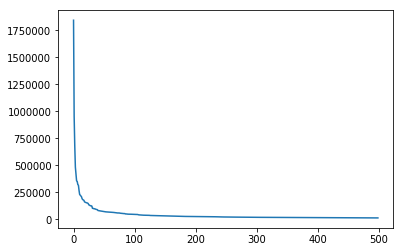

In [61]:
frequencies = [f for w, f in words_count.most_common(500)]
x = [i for i in range(500)]
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(x, frequencies)

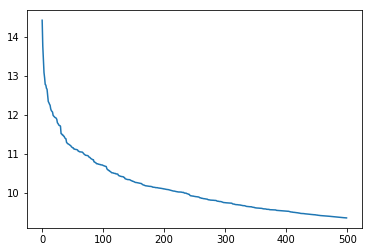

In [62]:
import numpy as np
plt.plot(x, np.log(frequencies))

In [63]:
def prob_1(word):
    return words_count[word] / len(TOKEN)

prob_1("我们")

0.0011462174213337233

In [65]:
TOEKN = [str(t) for t in TOKEN]
TOKEN_2_GRAM = [''.join(TOKEN[i:i + 2]) for i in range(len(TOKEN[:-2]))]
TOKEN_2_GRAM[:10]

['此外自', '自本周', '本周6', '6月', '月12', '12日起', '日起除', '除小米', '小米手机', '手机6']

In [68]:
words_count_2 = Counter(TOKEN_2_GRAM)
def prob_2(word1, word2):
    if word1 + word2 in words_count_2: return words_count_2[word1 + word2]/ len(TOKEN_2_GRAM)
    else:
        return 1/len(TOKEN_2_GRAM)

In [69]:
prob_2("我们", "在")

3.098121258193799e-05

In [72]:
def get_probability(sentence):
    words = cut(sentence)
    sentence_pro = 1
    for i, word in enumerate(words[:-1]):
        next_ = words[i+1]
        probability = prob_2(word, next_)
        sentence_pro *= probability
    return sentence_pro

get_probability('小明今天抽奖抽到一台苹果手机')

1.3488224022259134e-44

In [74]:
for sen in [generate(gram=example_grammar, target='sentence') for i in range(10)]:
    print('sentence: {} with Prb: {}'.format(sen, get_probability(sen)))

sentence: 一个蓝色的蓝色的小猫看着一个小猫 with Prb: 1.9617956605600993e-53
sentence: 这个蓝色的女人看见这个蓝色的篮球 with Prb: 1.2343832487333637e-51
sentence: 这个小小的蓝色的好看的桌子听着一个小猫 with Prb: 2.083414101913885e-64
sentence: 一个篮球看着这个蓝色的蓝色的篮球 with Prb: 2.660194915719495e-51
sentence: 这个桌子听着这个好看的女人 with Prb: 2.8931798741176928e-46
sentence: 这个桌子看着一个蓝色的桌子 with Prb: 7.61432001256564e-43
sentence: 一个小猫看见一个篮球 with Prb: 5.468899785126343e-30
sentence: 这个好看的好看的小猫看着这个好看的女人 with Prb: 1.0280709326822325e-65
sentence: 一个小小的好看的篮球看着这个篮球 with Prb: 2.760157547438078e-47
sentence: 一个篮球看着这个好看的篮球 with Prb: 4.282424106267131e-41


In [77]:
need_compared = [
    "今天晚上请你吃大餐，我们一起吃日料 明天晚上请你吃大餐，我们一起吃苹果",
    "真事一只好看的小猫 真是一只好看的小猫",
    "今晚我去吃火锅 今晚火锅去吃我",
    "洋葱奶昔来一杯 养乐多绿来一杯"
]

for s in need_compared:
    s1, s2 = s.split()
    p1, p2 = get_probability(s1), get_probability(s2)
    
    better = s1 if p1 > p2 else s2
    
    print('{} is more possible'.format(better))
    print('-'*4 + ' {} with probility {}'.format(s1, p1))
    print('-'*4 + ' {} with probility {}'.format(s2, p2))

今天晚上请你吃大餐，我们一起吃日料 is more possible
---- 今天晚上请你吃大餐，我们一起吃日料 with probility 1.6916371218895416e-68
---- 明天晚上请你吃大餐，我们一起吃苹果 with probility 1.240533889385664e-68
真是一只好看的小猫 is more possible
---- 真事一只好看的小猫 with probility 2.1681986202830525e-35
---- 真是一只好看的小猫 with probility 9.92377440176051e-28
今晚我去吃火锅 is more possible
---- 今晚我去吃火锅 with probility 1.5957247219373802e-20
---- 今晚火锅去吃我 with probility 1.0117464602483735e-28
养乐多绿来一杯 is more possible
---- 洋葱奶昔来一杯 with probility 3.1288720037987846e-23
---- 养乐多绿来一杯 with probility 4.773581720053238e-16
